# Confusion Matrix is a performance measurement for machine learning classification.

# Importing Important Libary and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# Splitting The Dataset

In [9]:
x = df.drop('DEATH_EVENT', axis=1)

In [10]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [11]:
y = df.DEATH_EVENT

In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=45, test_size=.28)

# Model Creation

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier()

In [17]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Score of This Model

In [18]:
pred = clf.predict(xtest)

In [19]:
pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [20]:
np.array(ytest)

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

# Accuracy Score

In [21]:
from sklearn.metrics import accuracy_score  

In [22]:
print (accuracy_score(ytest,pred))

0.7976190476190477


# Classification Report

In [23]:
from sklearn.metrics import classification_report 

In [24]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        59
           1       0.63      0.76      0.69        25

    accuracy                           0.80        84
   macro avg       0.76      0.79      0.77        84
weighted avg       0.81      0.80      0.80        84



# Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix 

In [26]:
confusion_matrix(ytest,pred)

array([[48, 11],
       [ 6, 19]], dtype=int64)

In [27]:
tp,fn,fp,tn = confusion_matrix(ytest,pred).reshape(-1)

In [28]:
tp,fn,fp,tn

(48, 11, 6, 19)

# Accuracy

In [29]:
(tp+tn)/(tp+tn+fp+fn)

0.7976190476190477

# Precision/Positive Predicted Value

In [30]:
tp/(tp+fp)

0.8888888888888888

# Sensitivity/Recall/hit Rate/True Positive Rate

In [31]:
tp/(tp+fn)

0.8135593220338984

# False Positive Rate / 1-Specificity

In [32]:
fp/(fp+tn)

0.24

# F1 Measure

In [33]:
# Precision+Recall / 2

In [34]:
((tp/(tp+fp))+(tp/(tp+fn))) / 2

0.8512241054613936

# Harmonic Mean / F1 Score

In [35]:
(2*((tp/(tp+fp))*(tp/(tp+fn))))/((tp/(tp+fp))+(tp/(tp+fn)))

0.8495575221238938

# Specificity / Selectivity / True Negative Score

In [36]:
tp / (tn+fp)

1.92

# Threat Score / Critical Success Index 

In [37]:
tp / (tp+fn+fp)

0.7384615384615385

# False Discovery Rate

In [38]:
fp / (tp+fp)

0.1111111111111111

# ROC Curve

In [39]:
from sklearn.metrics import plot_roc_curve

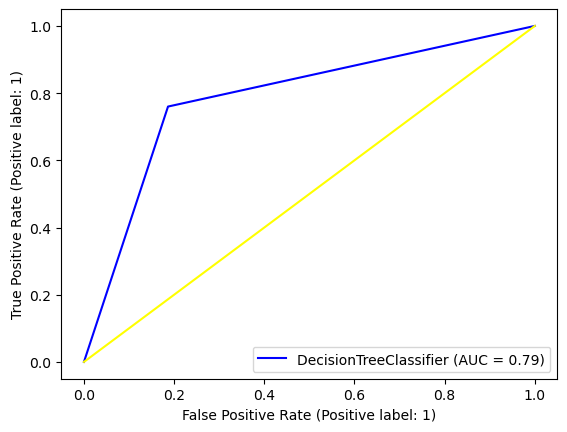

In [41]:
plot_roc_curve(clf , xtest , ytest, color='blue' )
plt.plot([0,1],[0,1],color= 'yellow') # for draw middle line

import warnings as wr 
wr.filterwarnings('ignore')

Thanks for Watching